In [1]:
# Dependencies
import gmaps
import numpy as np
import pandas as pd
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [66]:
unclean_wildfire_df = pd.read_csv('NOAA_csvs/wildfires_2010_2019.csv')
unclean_wildfire_df = pd.DataFrame(unclean_wildfire_df)
# clean_wildfire_df['County Name'] = clean_wildfire_df['County Name'].astype(str).str.replace('(ZONE)',' ')
# unclean_wildfire_df.head()
unclean_wildfire_df["CZ_NAME_STR"].value_counts()

WESTERN SISKIYOU COUNTY (ZONE)                                            32
SAN BERNARDINO AND RIVERSIDE COUNTY VALLEYS - THE INLAND EMPIRE (ZONE)    30
S SIERRA MTNS (ZONE)                                                      25
KERN CTY MTNS (ZONE)                                                      24
S SIERRA FOOTHILLS (ZONE)                                                 22
                                                                          ..
ORANGE COUNTY INLAND (ZONE)                                                1
SOUTHEASTERN MENDOCINO INTERIOR (ZONE)                                     1
SAN FRANCISCO PENINSULA COAST (ZONE)                                       1
LOS ANGELES COUNTY SAN GABRIEL VALLEY (ZONE)                               1
LOS ANGELES COUNTY COASTS INCLUDING DOWNTOWN LOS ANGELES (ZONE)            1
Name: CZ_NAME_STR, Length: 74, dtype: int64

In [39]:
unclean_wildfire_df.columns

Index(['EVENT_ID', 'CZ_NAME_STR', 'BEGIN_LOCATION', 'BEGIN_DATE', 'BEGIN_TIME',
       'EVENT_TYPE', 'MAGNITUDE', 'TOR_F_SCALE', 'DEATHS_DIRECT',
       'INJURIES_DIRECT', 'DAMAGE_PROPERTY_NUM', 'DAMAGE_CROPS_NUM',
       'STATE_ABBR', 'CZ_TIMEZONE', 'MAGNITUDE_TYPE', 'EPISODE_ID', 'CZ_TYPE',
       'CZ_FIPS', 'WFO', 'INJURIES_INDIRECT', 'DEATHS_INDIRECT', 'SOURCE',
       'FLOOD_CAUSE', 'TOR_LENGTH', 'TOR_WIDTH', 'BEGIN_RANGE',
       'BEGIN_AZIMUTH', 'END_RANGE', 'END_AZIMUTH', 'END_LOCATION',
       'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON', 'EVENT_NARRATIVE',
       'EPISODE_NARRATIVE', 'ABSOLUTE_ROWNUMBER'],
      dtype='object')

In [40]:
reduced_wildfire_df = unclean_wildfire_df[['EVENT_ID', 'CZ_NAME_STR', 'BEGIN_DATE', 'EVENT_TYPE', 'DEATHS_DIRECT', 'DEATHS_INDIRECT', 
                                       'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DAMAGE_PROPERTY_NUM', 'DAMAGE_CROPS_NUM', 'CZ_FIPS',
                                       'EVENT_NARRATIVE', 'EPISODE_NARRATIVE']]
reduced_wildfire_df

,EVENT_ID,CZ_NAME_STR,BEGIN_DATE,EVENT_TYPE,DEATHS_DIRECT,DEATHS_INDIRECT,INJURIES_DIRECT,INJURIES_INDIRECT,DAMAGE_PROPERTY_NUM,DAMAGE_CROPS_NUM,CZ_FIPS,EVENT_NARRATIVE,EPISODE_NARRATIVE
0,234746,SAN BERNARDINO AND RIVERSIDE COUNTY VALLEYS - ...,05/20/2010,Wildfire,0,0,0,1,0,0,48,NaN,The McKinley Fire began at approximately 1213 ...
1,250167,SAN DIEGO COUNTY COASTAL AREAS (ZONE),07/13/2010,Wildfire,0,0,0,0,0,0,43,NaN,The Camp Pendleton Fire began at approximately...
2,250175,SAN BERNARDINO AND RIVERSIDE COUNTY VALLEYS - ...,07/15/2010,Wildfire,0,0,1,0,17500,0,48,NaN,The Stetson Fire began at approximately 1000 P...
3,250169,RIVERSIDE COUNTY MOUNTAINS (ZONE),07/15/2010,Wildfire,0,0,0,0,0,0,56,NaN,The Cactus Fire began at approximately 1400 PS...
4,250171,SAN BERNARDINO AND RIVERSIDE COUNTY VALLEYS - ...,07/15/2010,Wildfire,0,0,0,0,0,0,48,NaN,The Skinner Fire began at approximately 1442 P...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,863910,VENTURA COUNTY COASTAL VALLEYS (ZONE),11/01/2019,Wildfire,0,0,0,0,0,0,45,The Easy Fire burned 1806 acres across the coa...,The Easy Fire started in late October across t...
394,863913,VENTURA COUNTY INTERIOR VALLEYS (ZONE),11/01/2019,Wildfire,0,0,0,0,0,0,44,The Maria Fire started in late October across ...,The Maria Fire started in late October across ...
395,863914,VENTURA COUNTY COASTAL VALLEYS (ZONE),11/01/2019,Wildfire,0,0,0,0,0,0,45,The Maria Fire started in late October across ...,The Maria Fire started in late October across ...
396,863915,VENTURA COUNTY COAST (ZONE),11/01/2019,Wildfire,0,0,0,0,0,0,40,The Maria Fire started in late October across ...,The Maria Fire started in late October across ...


In [41]:
clean_wildfire_df = reduced_wildfire_df.rename(columns={'EVENT_ID': 'NOAA ID', 
                                              'CZ_NAME_STR': 'County Name', 
                                              'BEGIN_DATE': 'Date', 
                                              'EVENT_TYPE': 'Type', 
                                              'DEATHS_DIRECT': 'Direct Deaths', 
                                              'DEATHS_INDIRECT': 'Indirect Deaths', 
                                              'INJURIES_DIRECT': 'Direct Injuries', 
                                              'INJURIES_INDIRECT': 'Indirect Injuries', 
                                              'DAMAGE_PROPERTY_NUM': 'Property Damage', 
                                              'DAMAGE_CROPS_NUM': 'Crop Damage', 
                                              'CZ_FIPS': 'NOAA FIPS',
                                              'EVENT_NARRATIVE': 'Event Narrative', 
                                              'EPISODE_NARRATIVE': 'Episode Narrative' })
clean_wildfire_df

,NOAA ID,County Name,Date,Type,Direct Deaths,Indirect Deaths,Direct Injuries,Indirect Injuries,Property Damage,Crop Damage,NOAA FIPS,Event Narrative,Episode Narrative
0,234746,SAN BERNARDINO AND RIVERSIDE COUNTY VALLEYS - ...,05/20/2010,Wildfire,0,0,0,1,0,0,48,NaN,The McKinley Fire began at approximately 1213 ...
1,250167,SAN DIEGO COUNTY COASTAL AREAS (ZONE),07/13/2010,Wildfire,0,0,0,0,0,0,43,NaN,The Camp Pendleton Fire began at approximately...
2,250175,SAN BERNARDINO AND RIVERSIDE COUNTY VALLEYS - ...,07/15/2010,Wildfire,0,0,1,0,17500,0,48,NaN,The Stetson Fire began at approximately 1000 P...
3,250169,RIVERSIDE COUNTY MOUNTAINS (ZONE),07/15/2010,Wildfire,0,0,0,0,0,0,56,NaN,The Cactus Fire began at approximately 1400 PS...
4,250171,SAN BERNARDINO AND RIVERSIDE COUNTY VALLEYS - ...,07/15/2010,Wildfire,0,0,0,0,0,0,48,NaN,The Skinner Fire began at approximately 1442 P...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,863910,VENTURA COUNTY COASTAL VALLEYS (ZONE),11/01/2019,Wildfire,0,0,0,0,0,0,45,The Easy Fire burned 1806 acres across the coa...,The Easy Fire started in late October across t...
394,863913,VENTURA COUNTY INTERIOR VALLEYS (ZONE),11/01/2019,Wildfire,0,0,0,0,0,0,44,The Maria Fire started in late October across ...,The Maria Fire started in late October across ...
395,863914,VENTURA COUNTY COASTAL VALLEYS (ZONE),11/01/2019,Wildfire,0,0,0,0,0,0,45,The Maria Fire started in late October across ...,The Maria Fire started in late October across ...
396,863915,VENTURA COUNTY COAST (ZONE),11/01/2019,Wildfire,0,0,0,0,0,0,40,The Maria Fire started in late October across ...,The Maria Fire started in late October across ...


In [42]:
clean_wildfire_df['County Name'].value_counts()

WESTERN SISKIYOU COUNTY (ZONE)                                            32
SAN BERNARDINO AND RIVERSIDE COUNTY VALLEYS - THE INLAND EMPIRE (ZONE)    30
S SIERRA MTNS (ZONE)                                                      25
KERN CTY MTNS (ZONE)                                                      24
S SIERRA FOOTHILLS (ZONE)                                                 22
                                                                          ..
ORANGE COUNTY INLAND (ZONE)                                                1
SOUTHEASTERN MENDOCINO INTERIOR (ZONE)                                     1
SAN FRANCISCO PENINSULA COAST (ZONE)                                       1
LOS ANGELES COUNTY SAN GABRIEL VALLEY (ZONE)                               1
LOS ANGELES COUNTY COASTS INCLUDING DOWNTOWN LOS ANGELES (ZONE)            1
Name: County Name, Length: 74, dtype: int64

In [45]:
clean_wildfire_df.dtypes

NOAA ID               int64
County Name          object
Date                 object
Type                 object
Direct Deaths         int64
Indirect Deaths       int64
Direct Injuries       int64
Indirect Injuries     int64
Property Damage       int64
Crop Damage           int64
NOAA FIPS             int64
Event Narrative      object
Episode Narrative    object
dtype: object

In [63]:
clean_wildfire_df['County Name'] = clean_wildfire_df['County Name'].astype(str).str.replace('(ZONE)',' ')
clean_wildfire_df = clean_wildfire_df.replace(to_replace="()", value=None)
# clean_wildfire_df.head(4)
clean_wildfire_df['County Name'].value_counts()


WESTERN SISKIYOU COUNTY ( )                                            32
SAN BERNARDINO AND RIVERSIDE COUNTY VALLEYS - THE INLAND EMPIRE ( )    30
S SIERRA MTNS ( )                                                      25
KERN CTY MTNS ( )                                                      24
S SIERRA FOOTHILLS ( )                                                 22
                                                                       ..
WEST CENTRAL SAN JOAQUIN VALLEY ( )                                     1
SAN FRANCISCO PENINSULA COAST ( )                                       1
ORANGE COUNTY INLAND ( )                                                1
SAN LUIS OBISPO COUNTY CENTRAL COAST ( )                                1
COASTAL NORTH BAY INCLUDING POINT REYES NATIONAL SEASHORE ( )           1
Name: County Name, Length: 74, dtype: int64

In [7]:
clean_wildfire_df["Direct Deaths"].value_counts()

0     372
1      10
2       7
3       5
4       2
86      1
8       1
Name: Direct Deaths, dtype: int64

In [8]:
clean_wildfire_df["Indirect Deaths"].value_counts()

0    391
1      6
2      1
Name: Indirect Deaths, dtype: int64

In [9]:
clean_wildfire_df["Direct Injuries"].value_counts()

0     341
1      13
2       8
4       7
3       7
5       5
6       4
8       3
19      2
12      2
9       2
21      1
18      1
10      1
7       1
Name: Direct Injuries, dtype: int64

In [10]:
clean_wildfire_df["Indirect Injuries"].value_counts()

0     370
3       8
1       7
4       4
2       3
12      2
10      1
9       1
6       1
5       1
Name: Indirect Injuries, dtype: int64

In [11]:
clean_wildfire_df["Property Damage"].value_counts()

0              320
500000           7
100000           6
1000000          5
5000             5
200000           4
400000           4
600000           3
50000            3
4000000          2
25000            2
6000             2
2000000          2
900000           2
22500000         1
250000           1
15000            1
50000000         1
7240000          1
550000           1
35000            1
17500            1
8000000          1
4500000          1
38400000         1
20000000         1
15000000         1
1500000000       1
20000            1
1000             1
5700000          1
56000000         1
7000000          1
4000             1
30000000         1
1500000          1
2500000          1
10000000         1
17000000000      1
25000000         1
8000             1
30000            1
3670000          1
1120000          1
10000            1
Name: Property Damage, dtype: int64

In [12]:
clean_wildfire_df["Crop Damage"].value_counts()

0       397
5000      1
Name: Crop Damage, dtype: int64

In [13]:
clean_wildfire_df["NOAA FIPS"].value_counts()

80     32
48     30
96     30
95     24
93     24
       ..
41      1
554     1
83      1
72      1
35      1
Name: NOAA FIPS, Length: 70, dtype: int64

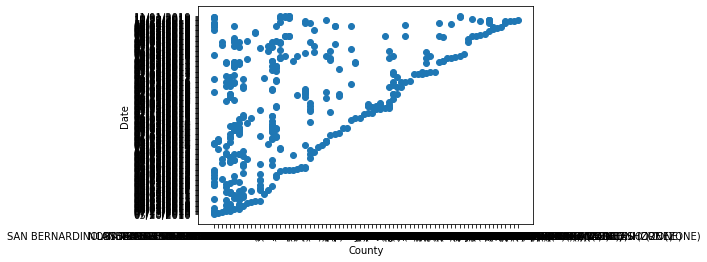

In [15]:
plt.scatter(clean_wildfire_df.iloc[:,1],clean_wildfire_df.iloc[:,2])
plt.xlabel('County')
plt.ylabel('Date')
plt.show()

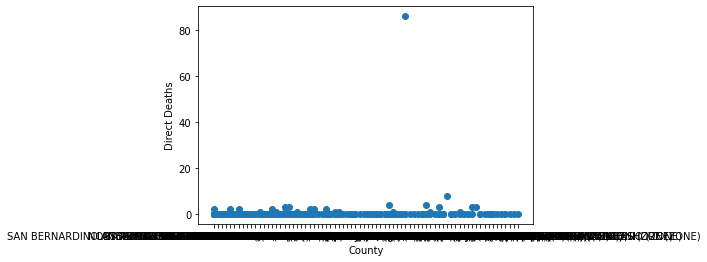

In [16]:
plt.scatter(clean_wildfire_df.iloc[:,1],clean_wildfire_df.iloc[:,4])
plt.xlabel('County')
plt.ylabel('Direct Deaths')
plt.show()

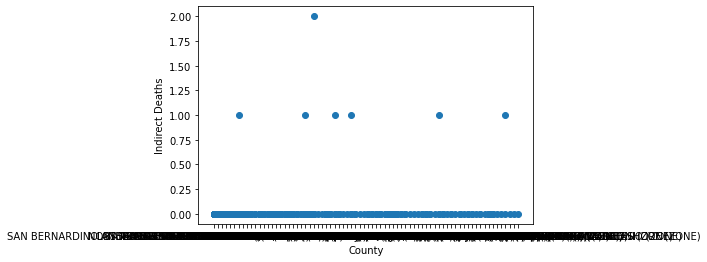

In [17]:
plt.scatter(clean_wildfire_df.iloc[:,1],clean_wildfire_df.iloc[:,5])
plt.xlabel('County')
plt.ylabel('Indirect Deaths')
plt.show()

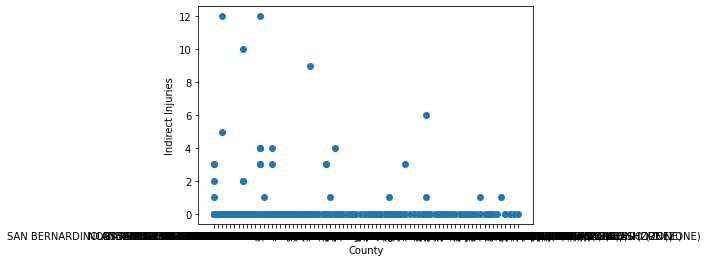

In [18]:
plt.scatter(clean_wildfire_df.iloc[:,1],clean_wildfire_df.iloc[:,7])
plt.xlabel('County')
plt.ylabel('Indirect Injuries')
plt.show()

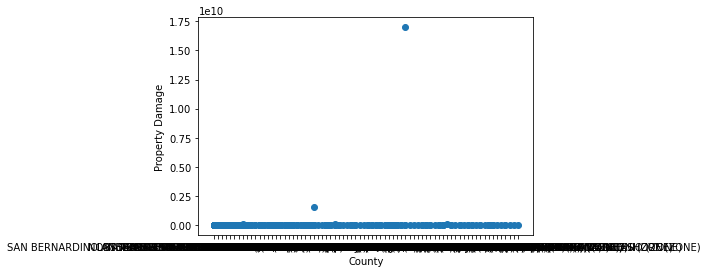

In [19]:
plt.scatter(clean_wildfire_df.iloc[:,1],clean_wildfire_df.iloc[:,8])
plt.xlabel('County')
plt.ylabel('Property Damage')
plt.show()

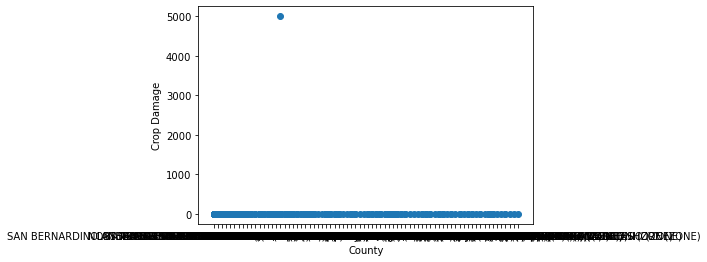

In [20]:
plt.scatter(clean_wildfire_df.iloc[:,1],clean_wildfire_df.iloc[:,9])
plt.xlabel('County')
plt.ylabel('Crop Damage')
plt.show()

In [23]:
clean_wildfire_df.dtypes

NOAA ID               int64
County Name          object
Date                 object
Type                 object
Direct Deaths         int64
Indirect Deaths       int64
Direct Injuries       int64
Indirect Injuries     int64
Property Damage       int64
Crop Damage           int64
NOAA FIPS             int64
Event Narrative      object
Episode Narrative    object
dtype: object

In [ ]:
clean_wildfire_df['County Name'] = clean_wildfire_df['County Name'].astype(str)
clean_wildfire_df